<a href="https://colab.research.google.com/github/SushrutReddy/DLAssignment/blob/main/DLAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow-datasets

import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix


In [3]:
(x_train, y_train), (x_test, y_test) = tfds.as_numpy(tfds.load(
    'kmnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print(f"Training Set: {x_train.shape}, Validation Set: {x_val.shape}, Test Set: {x_test.shape}")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/incomplete.9CYZFU_3.0.1/kmnist-train.tfrecord*...:   0%|          |…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/incomplete.9CYZFU_3.0.1/kmnist-test.tfrecord*...:   0%|          | …

Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.
Training Set: (54000, 28, 28, 1), Validation Set: (6000, 28, 28, 1), Test Set: (10000, 28, 28, 1)


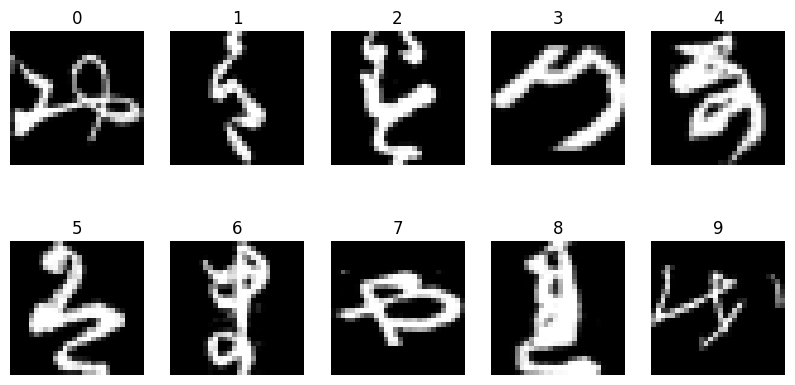

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax = axes[i // 5, i % 5]
    idx = np.where(y_train == i)[0][0]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(str(i))
    ax.axis('off')
plt.show()


In [5]:
hyperparameter_combinations = [
    (5, [32, 32, 32], 0.0005, 1e-3, 'adam', 32, 'relu'),
    (10, [64, 64, 64, 64], 0, 1e-4, 'sgd', 16, 'sigmoid'),
    (5, [128, 128, 128, 128, 128], 0.5, 1e-3, 'rmsprop', 64, 'relu'),
    (10, [32, 32, 32], 0.0005, 1e-4, 'nadam', 32, 'sigmoid'),
    (5, [64, 64, 64, 64], 0, 1e-3, 'nesterov', 16, 'relu'),
    (10, [128, 128, 128, 128, 128], 0.5, 1e-4, 'momentum', 64, 'sigmoid'),
    (5, [32, 32, 32], 0.0005, 1e-3, 'sgd', 32, 'relu'),
    (10, [64, 64, 64, 64], 0, 1e-4, 'adam', 16, 'sigmoid')
]
def create_model(hidden_layers, activation, optimizer, weight_decay, learning_rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    for units in hidden_layers:
        model.add(tf.keras.layers.Dense(units=units, activation=activation, kernel_regularizer=l2(weight_decay)))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    if optimizer in ['momentum', 'nesterov']:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=(optimizer == 'nesterov'))
    else:
        optimizer = tf.keras.optimizers.get({'class_name': optimizer, 'config': {'learning_rate': learning_rate}})

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [6]:
results = []
for i, (num_epochs, hidden_layers, weight_decay, learning_rate, optimizer, batch_size, activation) in enumerate(hyperparameter_combinations):
    print(f"\nTraining Model {i+1} with: "
          f"Epochs={num_epochs}, Layers={hidden_layers}, Weight Decay={weight_decay}, "
          f"LR={learning_rate}, Optimizer={optimizer}, Batch Size={batch_size}, Activation={activation}")

    model = create_model(hidden_layers, activation, optimizer, weight_decay, learning_rate)
    history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)

    val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    results.append({
        'Model': i+1,
        'Epochs': num_epochs,
        'Hidden Layers': hidden_layers,
        'Weight Decay': weight_decay,
        'Learning Rate': learning_rate,
        'Optimizer': optimizer,
        'Batch Size': batch_size,
        'Activation': activation,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc
    })

df_results = pd.DataFrame(results)
display(df_results)



Training Model 1 with: Epochs=5, Layers=[32, 32, 32], Weight Decay=0.0005, LR=0.001, Optimizer=adam, Batch Size=32, Activation=relu


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7321 - loss: 0.9275 - val_accuracy: 0.8933 - val_loss: 0.4288
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9020 - loss: 0.4102 - val_accuracy: 0.9002 - val_loss: 0.4009
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9196 - loss: 0.3580 - val_accuracy: 0.9163 - val_loss: 0.3669
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9276 - loss: 0.3355 - val_accuracy: 0.9205 - val_loss: 0.3508
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9325 - loss: 0.3158 - val_accuracy: 0.9222 - val_loss: 0.3396

Training Model 2 with: Epochs=10, Layers=[64, 64, 64, 64], Weight Decay=0, LR=0.0001, Optimizer=sgd, Batch Size=16, Activation=sigmoid
Epoch 1/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0990 - loss: 2.4206 - val_accuracy: 0.1033 - val_loss: 2.3539
Epoch 2/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.1003 - loss: 2.3446 

,Model,Epochs,Hidden Layers,Weight Decay,Learning Rate,Optimizer,Batch Size,Activation,Validation Accuracy,Test Accuracy
0,1,5,"[32, 32, 32]",0.0005,0.0010,adam,32,relu,0.922167,0.8387
1,2,10,"[64, 64, 64, 64]",0.0000,0.0001,sgd,16,sigmoid,0.100667,0.1062
2,3,5,"[128, 128, 128, 128, 128]",0.5000,0.0010,rmsprop,64,relu,0.097833,0.1000
3,4,10,"[32, 32, 32]",0.0005,0.0001,nadam,32,sigmoid,0.757500,0.5895
4,5,5,"[64, 64, 64, 64]",0.0000,0.0010,nesterov,16,relu,0.922333,0.8282
5,6,10,"[128, 128, 128, 128, 128]",0.5000,0.0001,momentum,64,sigmoid,0.101833,0.1000
6,7,5,"[32, 32, 32]",0.0005,0.0010,sgd,32,relu,0.713833,0.5608
7,8,10,"[64, 64, 64, 64]",0.0000,0.0001,adam,16,sigmoid,0.874833,0.7607


In [7]:
best_model_config = df_results.loc[df_results['Validation Accuracy'].idxmax()]

num_epochs = best_model_config['Epochs']
hidden_layers = best_model_config['Hidden Layers']
weight_decay = best_model_config['Weight Decay']
learning_rate = best_model_config['Learning Rate']
optimizer = best_model_config['Optimizer']
batch_size = best_model_config['Batch Size']
activation = best_model_config['Activation']

best_model = create_model(hidden_layers, activation, optimizer, weight_decay, learning_rate)
best_model.fit(np.vstack([x_train, x_val]), np.hstack([y_train, y_val]), epochs=num_epochs, batch_size=batch_size, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5907 - loss: 1.2385
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8813 - loss: 0.3911
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9142 - loss: 0.2792
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9315 - loss: 0.2244
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9443 - loss: 0.1852


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8333 - loss: 0.5678
Test Accuracy with Cross-Entropy Loss: 0.8336
Test Loss with Cross-Entropy: 0.5577
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


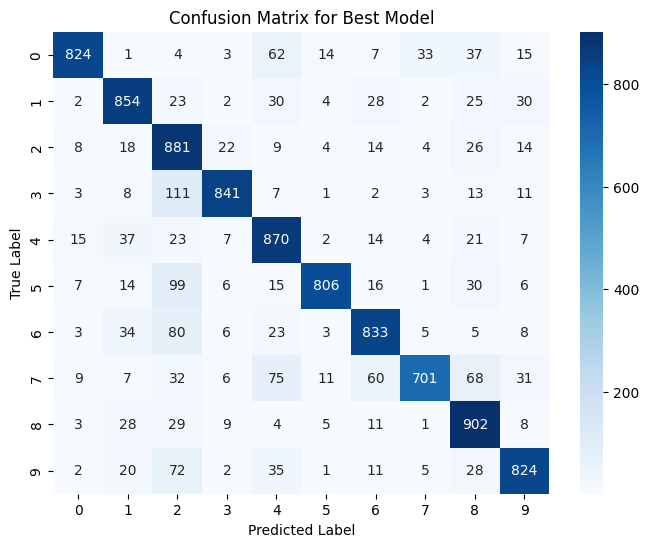

In [8]:
test_loss_ce, test_acc_ce = best_model.evaluate(x_test, y_test, verbose=1)
print(f'Test Accuracy with Cross-Entropy Loss: {test_acc_ce:.4f}')
print(f'Test Loss with Cross-Entropy: {test_loss_ce:.4f}')
y_pred = np.argmax(best_model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Best Model')
plt.show()


In [10]:
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val_onehot = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_train_val_onehot = np.vstack([y_train_onehot, y_val_onehot])
best_model_mse = create_model(hidden_layers, activation, 'sgd', weight_decay, learning_rate)
best_model_mse.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True), loss='mean_squared_error', metrics=['accuracy'])

best_model_mse.fit(np.vstack([x_train, x_val]), y_train_val_onehot, epochs=num_epochs, batch_size=batch_size, verbose=1)
test_loss_mse, test_acc_mse = best_model_mse.evaluate(x_test, tf.keras.utils.to_categorical(y_test, num_classes=10), verbose=1)

print(f'Test Accuracy with Squared Error Loss: {test_acc_mse:.4f}')
print(f'Test Loss with Squared Error: {test_loss_mse:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1388 - loss: 0.0899
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.2201 - loss: 0.0874
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.3555 - loss: 0.0794
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5713 - loss: 0.0626
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6729 - loss: 0.0482
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5392 - loss: 0.0616
Test Accuracy with Squared Error Loss: 0.5358
Test Loss with Squared Error: 0.0619


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/incomplete.LBO3EH_3.0.1/kmnist-train.tfrecord*...:   0%|          |…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/incomplete.LBO3EH_3.0.1/kmnist-test.tfrecord*...:   0%|          | …

Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.


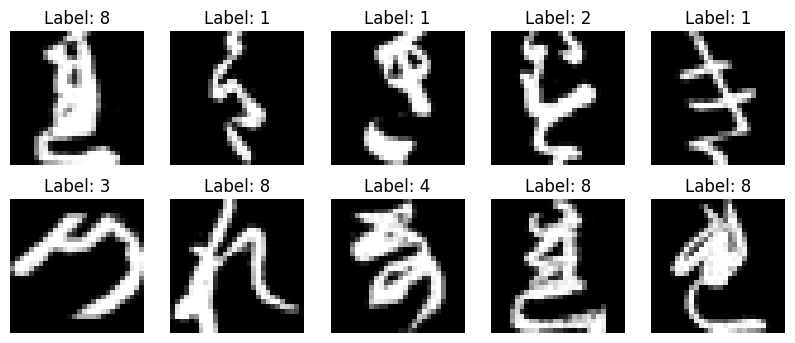

In [3]:
#

!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def FFNN(input_size, num_layers, neurons, out, act_fun='relu', dropout=0.0, reg_type=None, reg_value=0.01):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    # Regularization
    if reg_type == 'l1':
        regularizer = regularizers.l1(reg_value)
    elif reg_type == 'l2':
        regularizer = regularizers.l2(reg_value)
    elif reg_type == 'l1_l2':
        regularizer = regularizers.l1_l2(reg_value)
    else:
        regularizer = None

    # Hidden layers
    for _ in range(num_layers):
        model.add(layers.Dense(neurons, activation=act_fun, kernel_regularizer=regularizer))
        if dropout > 0:
            model.add(layers.Dropout(dropout))

    # Output Layer
    model.add(layers.Dense(out, activation='softmax'))
    return model

def input_optimizer(name, learning_rate=1e-3, momentum=0.9):
    optimizers_dict = {
        'sgd': optimizers.SGD(learning_rate=learning_rate),
        'mgd': optimizers.SGD(learning_rate=learning_rate, momentum=momentum),
        'ngd': optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=True),
        'rmsprop': optimizers.RMSprop(learning_rate=learning_rate),
        'adam': optimizers.Adam(learning_rate=learning_rate),
        'adadelta': optimizers.Adadelta(learning_rate=learning_rate)
    }
    return optimizers_dict.get(name, optimizers.Adam(learning_rate=learning_rate))

def training(model, traindata, trainlabels, valdata, vallabels, batch_size, epochs, optimizer, loss_function='categorical_crossentropy'):
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
    history = model.fit(traindata, trainlabels, epochs=epochs, batch_size=batch_size, validation_data=(valdata, vallabels))
    return model, history

def evaluate_model(model, test_data, test_labels):
    test_loss, test_accuracy = model.evaluate(test_data, test_labels)
    return test_loss, test_accuracy

def load_kmnist_data():
    (traindata, trainlabels), (test_data, test_labels) = tfds.as_numpy(tfds.load(
        'kmnist',
        split=['train', 'test'],
        batch_size=-1,
        as_supervised=True,
    ))
    traindata = traindata / 255.0
    test_data = test_data / 255.0
    traindata, valdata, trainlabels, vallabels = train_test_split(traindata, trainlabels, test_size=0.1, random_state=42)
    trainlabels = to_categorical(trainlabels, 10)
    vallabels = to_categorical(vallabels, 10)
    test_labels = to_categorical(test_labels, 10)

    return traindata, trainlabels, valdata, vallabels, test_data, test_labels

def conf_matrix(cm, class_names):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Load data
traindata, trainlabels, valdata, vallabels, test_data, test_labels = load_kmnist_data()

In [ ]:
def userinput():
    print("Please provide the following hyperparameters:")
    layers = int(input("Number of layers (e.g., 2, 3): "))
    neurons = int(input("Number of neurons (e.g., 64, 128): "))
    batch_size = int(input("Batch size (e.g., 32, 64): "))
    lr = float(input("Learning rate (e.g., 0.001, 0.0001): "))
    optimizer = input("Optimizer (e.g., sgd, mgd, rmsprop, adam, ngd): ").lower()
    act_fun = input("Activation function (e.g., relu, sigmoid): ")
    dropout = float(input("Dropout rate (e.g., 0.0, 0.3): "))
    reg_type = input("Regularization type (e.g., l1, l2, none): ")
    reg_value = float(input("Regularization value (e.g., 0.01, 0.1): "))
    epochs = int(input("Number of epochs (e.g., 3, 5): "))
    user_inputs = {
        "layers": [layers],
        "neurons": [neurons],
        "batch_sizes": [batch_size],
        "LR": [lr],
        "op_list": [optimizer],
        "act_funs": [act_fun],
        "dropouts": [dropout],
        "reg_types": [reg_type],
        "reg_values": [reg_value],
        "epochs": [epochs]
    }

    if optimizer == 'sgd':
        best_model, best_combination, best_accuracy = hyperparameter_search_part1(user_inputs, traindata, trainlabels, valdata, vallabels)
    elif optimizer == 'mgd':
        best_model, best_combination, best_accuracy = hyperparameter_search_part3(user_inputs, traindata, trainlabels, valdata, vallabels)
    elif optimizer == 'rmsprop':
        best_model, best_combination, best_accuracy = hyperparameter_search_part5(user_inputs, traindata, trainlabels, valdata, vallabels)
    elif optimizer == 'adam':
        best_model, best_combination, best_accuracy = hyperparameter_search_part7(user_inputs, traindata, trainlabels, valdata, vallabels)
    elif optimizer == 'ngd':
        best_model, best_combination, best_accuracy = hyperparameter_search_part5(user_inputs, traindata, trainlabels, valdata, vallabels)
    else:
        print("Invalid optimizer choice. Please choose from: sgd, mgd, rmsprop, adam, ngd")
        return

    print(f"Best Combination (User Inputs): {best_combination}, Accuracy: {best_accuracy}")
    test_loss, test_accuracy = evaluate_model(best_model, test_data, test_labels)
    print(f"Test Accuracy (User Inputs): {test_accuracy}")
    test_predictions = np.argmax(best_model.predict(test_data), axis=1)
    cm = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
    conf_matrix(cm, class_names=[str(i) for i in range(10)])
userinput()

In [2]:
def hyperparameter_search_part1(params, traindata, trainlabels, valdata, vallabels):
    best_accuracy = 0
    best_model = None
    best_combination = {}

    for epochs in params["epochs"]:
        for layers in params["layers"]:
            for neurons in params["neurons"]:
                for batch_size in params["batch_sizes"]:
                    for lr in params["LR"]:
                        for dropout in params["dropouts"]:
                            for reg_type in params["reg_types"]:
                                for reg_value in params["reg_values"]:
                                    print(f"Training with Layers: {layers}, Neurons: {neurons}, Epochs: {epochs}, Batch Size: {batch_size}, LR: {lr}, Optimizer: sgd, Activation: relu, Dropout: {dropout}, Reg: {reg_type}, Reg Value: {reg_value}")
                                    model = FFNN(28*28, layers, neurons, 10, act_fun='relu', dropout=dropout, reg_type=reg_type, reg_value=reg_value)
                                    optimizer = input_optimizer('sgd', lr)
                                    model, history = training(model, traindata, trainlabels, valdata, vallabels, batch_size, epochs, optimizer)
                                    val_accuracy = history.history['val_accuracy'][-1]
                                    if val_accuracy > best_accuracy:
                                        best_accuracy = val_accuracy
                                        best_model = model
                                        best_combination = {"layers": layers, "neurons": neurons, "epochs": epochs, "batch_size": batch_size, "learning_rate": lr, "optimizer": 'sgd', "act_fun": 'relu', "dropout": dropout, "regularization": reg_type, "reg_value": reg_value}

    return best_model, best_combination, best_accuracy

params_part1 = {
    "layers": [2, 3],
    "neurons": [64, 128],
    "batch_sizes": [32, 64],
    "LR": [0.001, 0.0001],
    "dropouts": [0.0, 0.3],
    "reg_types": ['l1', 'l2'],
    "reg_values": [0.01, 0.1],
    "epochs": [3, 5]
}

best_model_part1, best_combination_part1, best_accuracy_part1 = hyperparameter_search_part1(params_part1, traindata, trainlabels, valdata, vallabels)
print(f"Best Combination (Part 1): {best_combination_part1}, Accuracy: {best_accuracy_part1}")

NameError: name 'traindata' is not defined

In [ ]:
def hyperparameter_search_part2(params, traindata, trainlabels, valdata, vallabels):
    best_accuracy = 0
    best_model = None
    best_combination = {}

    for epochs in params["epochs"]:
        for layers in params["layers"]:
            for neurons in params["neurons"]:
                for batch_size in params["batch_sizes"]:
                    for lr in params["LR"]:
                        for dropout in params["dropouts"]:
                            for reg_type in params["reg_types"]:
                                for reg_value in params["reg_values"]:
                                    print(f"Training with Layers: {layers}, Neurons: {neurons}, Epochs: {epochs}, Batch Size: {batch_size}, LR: {lr}, Optimizer: sgd, Activation: sigmoid, Dropout: {dropout}, Reg: {reg_type}, Reg Value: {reg_value}")
                                    model = FFNN(28*28, layers, neurons, 10, act_fun='sigmoid', dropout=dropout, reg_type=reg_type, reg_value=reg_value)
                                    optimizer = input_optimizer('sgd', lr)
                                    model, history = training(model, traindata, trainlabels, valdata, vallabels, batch_size, epochs, optimizer)
                                    val_accuracy = history.history['val_accuracy'][-1]
                                    if val_accuracy > best_accuracy:
                                        best_accuracy = val_accuracy
                                        best_model = model
                                        best_combination = {"layers": layers, "neurons": neurons, "epochs": epochs, "batch_size": batch_size, "learning_rate": lr, "optimizer": 'sgd', "act_fun": 'sigmoid', "dropout": dropout, "regularization": reg_type, "reg_value": reg_value}

    return best_model, best_combination, best_accuracy

params_part2 = {
    "layers": [2, 3],
    "neurons": [64, 128],
    "batch_sizes": [32, 64],
    "LR": [0.001, 0.0001],
    "dropouts": [0.0, 0.3],
    "reg_types": ['l1', 'l2'],
    "reg_values": [0.01, 0.1],
    "epochs": [3, 5]
}

best_model_part2, best_combination_part2, best_accuracy_part2 = hyperparameter_search_part2(params_part2, traindata, trainlabels, valdata, vallabels)
print(f"Best Combination (Part 2): {best_combination_part2}, Accuracy: {best_accuracy_part2}")

In [ ]:
def hyperparameter_search_part3(params, traindata, trainlabels, valdata, vallabels):
    best_accuracy = 0
    best_model = None
    best_combination = {}

    for epochs in params["epochs"]:
        for layers in params["layers"]:
            for neurons in params["neurons"]:
                for batch_size in params["batch_sizes"]:
                    for lr in params["LR"]:
                        for dropout in params["dropouts"]:
                            for reg_type in params["reg_types"]:
                                for reg_value in params["reg_values"]:
                                    print(f"Training with Layers: {layers}, Neurons: {neurons}, Epochs: {epochs}, Batch Size: {batch_size}, LR: {lr}, Optimizer: mgd, Activation: relu, Dropout: {dropout}, Reg: {reg_type}, Reg Value: {reg_value}")
                                    model = FFNN(28*28, layers, neurons, 10, act_fun='relu', dropout=dropout, reg_type=reg_type, reg_value=reg_value)
                                    optimizer = input_optimizer('mgd', lr)
                                    model, history = training(model, traindata, trainlabels, valdata, vallabels, batch_size, epochs, optimizer)
                                    val_accuracy = history.history['val_accuracy'][-1]
                                    if val_accuracy > best_accuracy:
                                        best_accuracy = val_accuracy
                                        best_model = model
                                        best_combination = {"layers": layers, "neurons": neurons, "epochs": epochs, "batch_size": batch_size, "learning_rate": lr, "optimizer": 'mgd', "act_fun": 'relu', "dropout": dropout, "regularization": reg_type, "reg_value": reg_value}

    return best_model, best_combination, best_accuracy

params_part3 = {
    "layers": [2, 3],
    "neurons": [64, 128],
    "batch_sizes": [32, 64],
    "LR": [0.001, 0.0001],
    "dropouts": [0.0, 0.3],
    "reg_types": ['l1', 'l2'],
    "reg_values": [0.01, 0.1],
    "epochs": [3, 5]
}

best_model_part3, best_combination_part3, best_accuracy_part3 = hyperparameter_search_part3(params_part3, traindata, trainlabels, valdata, vallabels)
print(f"Best Combination (Part 3): {best_combination_part3}, Accuracy: {best_accuracy_part3}")

In [ ]:
def hyperparameter_search_part4(params, traindata, trainlabels, valdata, vallabels):
    best_accuracy = 0
    best_model = None
    best_combination = {}

    for epochs in params["epochs"]:
        for layers in params["layers"]:
            for neurons in params["neurons"]:
                for batch_size in params["batch_sizes"]:
                    for lr in params["LR"]:
                        for dropout in params["dropouts"]:
                            for reg_type in params["reg_types"]:
                                for reg_value in params["reg_values"]:
                                    print(f"Training with Layers: {layers}, Neurons: {neurons}, Epochs: {epochs}, Batch Size: {batch_size}, LR: {lr}, Optimizer: mgd, Activation: sigmoid, Dropout: {dropout}, Reg: {reg_type}, Reg Value: {reg_value}")
                                    model = FFNN(28*28, layers, neurons, 10, act_fun='sigmoid', dropout=dropout, reg_type=reg_type, reg_value=reg_value)
                                    optimizer = input_optimizer('mgd', lr)
                                    model, history = training(model, traindata, trainlabels, valdata, vallabels, batch_size, epochs, optimizer)
                                    val_accuracy = history.history['val_accuracy'][-1]
                                    if val_accuracy > best_accuracy:
                                        best_accuracy = val_accuracy
                                        best_model = model
                                        best_combination = {"layers": layers, "neurons": neurons, "epochs": epochs, "batch_size": batch_size, "learning_rate": lr, "optimizer": 'mgd', "act_fun": 'sigmoid', "dropout": dropout, "regularization": reg_type, "reg_value": reg_value}

    return best_model, best_combination, best_accuracy

params_part4 = {
    "layers": [2, 3],
    "neurons": [64, 128],
    "batch_sizes": [32, 64],
    "LR": [0.001, 0.0001],
    "dropouts": [0.0, 0.3],
    "reg_types": ['l1', 'l2'],
    "reg_values": [0.01, 0.1],
    "epochs": [3, 5]
}

best_model_part4, best_combination_part4, best_accuracy_part4 = hyperparameter_search_part4(params_part4, traindata, trainlabels, valdata, vallabels)
print(f"Best Combination (Part 4): {best_combination_part4}, Accuracy: {best_accuracy_part4}")

In [ ]:
def hyperparameter_search_part5(params, traindata, trainlabels, valdata, vallabels):
    best_accuracy = 0
    best_model = None
    best_combination = {}

    for epochs in params["epochs"]:
        for layers in params["layers"]:
            for neurons in params["neurons"]:
                for batch_size in params["batch_sizes"]:
                    for lr in params["LR"]:
                        for dropout in params["dropouts"]:
                            for reg_type in params["reg_types"]:
                                for reg_value in params["reg_values"]:
                                    print(f"Training with Layers: {layers}, Neurons: {neurons}, Epochs: {epochs}, Batch Size: {batch_size}, LR: {lr}, Optimizer: rmsprop, Activation: relu, Dropout: {dropout}, Reg: {reg_type}, Reg Value: {reg_value}")
                                    model = FFNN(28*28, layers, neurons, 10, act_fun='relu', dropout=dropout, reg_type=reg_type, reg_value=reg_value)
                                    optimizer = input_optimizer('rmsprop', lr)
                                    model, history = training(model, traindata, trainlabels, valdata, vallabels, batch_size, epochs, optimizer)
                                    val_accuracy = history.history['val_accuracy'][-1]
                                    if val_accuracy > best_accuracy:
                                        best_accuracy = val_accuracy
                                        best_model = model
                                        best_combination = {"layers": layers, "neurons": neurons, "epochs": epochs, "batch_size": batch_size, "learning_rate": lr, "optimizer": 'rmsprop', "act_fun": 'relu', "dropout": dropout, "regularization": reg_type, "reg_value": reg_value}

    return best_model, best_combination, best_accuracy

params_part5 = {
    "layers": [2, 3],
    "neurons": [64, 128],
    "batch_sizes": [32, 64],
    "LR": [0.001, 0.0001],
    "dropouts": [0.0, 0.3],
    "reg_types": ['l1', 'l2'],
    "reg_values": [0.01, 0.1],
    "epochs": [3, 5]
}

best_model_part5, best_combination_part5, best_accuracy_part5 = hyperparameter_search_part5(params_part5, traindata, trainlabels, valdata, vallabels)
print(f"Best Combination (Part 5): {best_combination_part5}, Accuracy: {best_accuracy_part5}")

In [ ]:
def hyperparameter_search_part6(params, traindata, trainlabels, valdata, vallabels):
    best_accuracy = 0
    best_model = None
    best_combination = {}

    for epochs in params["epochs"]:
        for layers in params["layers"]:
            for neurons in params["neurons"]:
                for batch_size in params["batch_sizes"]:
                    for lr in params["LR"]:
                        for dropout in params["dropouts"]:
                            for reg_type in params["reg_types"]:
                                for reg_value in params["reg_values"]:
                                    print(f"Training with Layers: {layers}, Neurons: {neurons}, Epochs: {epochs}, Batch Size: {batch_size}, LR: {lr}, Optimizer: rmsprop, Activation: sigmoid, Dropout: {dropout}, Reg: {reg_type}, Reg Value: {reg_value}")
                                    model = FFNN(28*28, layers, neurons, 10, act_fun='sigmoid', dropout=dropout, reg_type=reg_type, reg_value=reg_value)
                                    optimizer = input_optimizer('rmsprop', lr)
                                    model, history = training(model, traindata, trainlabels, valdata, vallabels, batch_size, epochs, optimizer)
                                    val_accuracy = history.history['val_accuracy'][-1]
                                    if val_accuracy > best_accuracy:
                                        best_accuracy = val_accuracy
                                        best_model = model
                                        best_combination = {"layers": layers, "neurons": neurons, "epochs": epochs, "batch_size": batch_size, "learning_rate": lr, "optimizer": 'rmsprop', "act_fun": 'sigmoid', "dropout": dropout, "regularization": reg_type, "reg_value": reg_value}

    return best_model, best_combination, best_accuracy

params_part6 = {
    "layers": [2, 3],
    "neurons": [64, 128],
    "batch_sizes": [32, 64],
    "LR": [0.001, 0.0001],
    "dropouts": [0.0, 0.3],
    "reg_types": ['l1', 'l2'],
    "reg_values": [0.01, 0.1],
    "epochs": [3, 5]
}

best_model_part6, best_combination_part6, best_accuracy_part6 = hyperparameter_search_part6(params_part6, traindata, trainlabels, valdata, vallabels)
print(f"Best Combination (Part 6): {best_combination_part6}, Accuracy: {best_accuracy_part6}")

In [ ]:
def hyperparameter_search_part7(params, traindata, trainlabels, valdata, vallabels):
    best_accuracy = 0
    best_model = None
    best_combination = {}

    for epochs in params["epochs"]:
        for layers in params["layers"]:
            for neurons in params["neurons"]:
                for batch_size in params["batch_sizes"]:
                    for lr in params["LR"]:
                        for dropout in params["dropouts"]:
                            for reg_type in params["reg_types"]:
                                for reg_value in params["reg_values"]:
                                    print(f"Training with Layers: {layers}, Neurons: {neurons}, Epochs: {epochs}, Batch Size: {batch_size}, LR: {lr}, Optimizer: adam, Activation: relu, Dropout: {dropout}, Reg: {reg_type}, Reg Value: {reg_value}")
                                    model = FFNN(28*28, layers, neurons, 10, act_fun='relu', dropout=dropout, reg_type=reg_type, reg_value=reg_value)
                                    optimizer = input_optimizer('adam', lr)
                                    model, history = training(model, traindata, trainlabels, valdata, vallabels, batch_size, epochs, optimizer)
                                    val_accuracy = history.history['val_accuracy'][-1]
                                    if val_accuracy > best_accuracy:
                                        best_accuracy = val_accuracy
                                        best_model = model
                                        best_combination = {"layers": layers, "neurons": neurons, "epochs": epochs, "batch_size": batch_size, "learning_rate": lr, "optimizer": 'adam', "act_fun": 'relu', "dropout": dropout, "regularization": reg_type, "reg_value": reg_value}

    return best_model, best_combination, best_accuracy

params_part7 = {
    "layers": [2, 3],
    "neurons": [64, 128],
    "batch_sizes": [32, 64],
    "LR": [0.001, 0.0001],
    "dropouts": [0.0, 0.3],
    "reg_types": ['l1', 'l2'],
    "reg_values": [0.01, 0.1],
    "epochs": [3, 5]
}

best_model_part7, best_combination_part7, best_accuracy_part7 = hyperparameter_search_part7(params_part7, traindata, trainlabels, valdata, vallabels)
print(f"Best Combination (Part 7): {best_combination_part7}, Accuracy: {best_accuracy_part7}")

In [ ]:
def hyperparameter_search_part8(params, traindata, trainlabels, valdata, vallabels):
    best_accuracy = 0
    best_model = None
    best_combination = {}

    for epochs in params["epochs"]:
        for layers in params["layers"]:
            for neurons in params["neurons"]:
                for batch_size in params["batch_sizes"]:
                    for lr in params["LR"]:
                        for dropout in params["dropouts"]:
                            for reg_type in params["reg_types"]:
                                for reg_value in params["reg_values"]:
                                    print(f"Training with Layers: {layers}, Neurons: {neurons}, Epochs: {epochs}, Batch Size: {batch_size}, LR: {lr}, Optimizer: adam, Activation: sigmoid, Dropout: {dropout}, Reg: {reg_type}, Reg Value: {reg_value}")
                                    model = FFNN(28*28, layers, neurons, 10, act_fun='sigmoid', dropout=dropout, reg_type=reg_type, reg_value=reg_value)
                                    optimizer = input_optimizer('adam', lr)
                                    model, history = training(model, traindata, trainlabels, valdata, vallabels, batch_size, epochs, optimizer)
                                    val_accuracy = history.history['val_accuracy'][-1]
                                    if val_accuracy > best_accuracy:
                                        best_accuracy = val_accuracy
                                        best_model = model
                                        best_combination = {"layers": layers, "neurons": neurons, "epochs": epochs, "batch_size": batch_size, "learning_rate": lr, "optimizer": 'adam', "act_fun": 'sigmoid', "dropout": dropout, "regularization": reg_type, "reg_value": reg_value}

    return best_model, best_combination, best_accuracy

params_part8 = {
    "layers": [2, 3],
    "neurons": [64, 128],
    "batch_sizes": [32, 64],
    "LR": [0.001, 0.0001],
    "dropouts": [0.0, 0.3],
    "reg_types": ['l1', 'l2'],
    "reg_values": [0.01, 0.1],
    "epochs": [3, 5]
}
best_model_part8, best_combination_part8, best_accuracy_part8 = hyperparameter_search_part8(params_part8, traindata, trainlabels, valdata, vallabels)
print(f"Best Combination (Part 8): {best_combination_part8}, Accuracy: {best_accuracy_part8}")

In [ ]:
best_accuracy = max(
    best_accuracy_part1, best_accuracy_part2, best_accuracy_part3, best_accuracy_part4,
    best_accuracy_part5, best_accuracy_part6, best_accuracy_part7, best_accuracy_part8
)
if best_accuracy == best_accuracy_part1:
    best_model = best_model_part1
    best_combination = best_combination_part1
elif best_accuracy == best_accuracy_part2:
    best_model = best_model_part2
    best_combination = best_combination_part2
elif best_accuracy == best_accuracy_part3:
    best_model = best_model_part3
    best_combination = best_combination_part3
elif best_accuracy == best_accuracy_part4:
    best_model = best_model_part4
    best_combination = best_combination_part4
elif best_accuracy == best_accuracy_part5:
    best_model = best_model_part5
    best_combination = best_combination_part5
elif best_accuracy == best_accuracy_part6:
    best_model = best_model_part6
    best_combination = best_combination_part6
elif best_accuracy == best_accuracy_part7:
    best_model = best_model_part7
    best_combination = best_combination_part7
elif best_accuracy == best_accuracy_part8:
    best_model = best_model_part8
    best_combination = best_combination_part8
print(f"Overall Best Combination: {best_combination}, Accuracy: {best_accuracy}")
test_loss, test_accuracy = evaluate_model(best_model, test_data, test_labels)
print(f"Test Accuracy: {test_accuracy}")

# Confusion matrix
test_predictions = np.argmax(best_model.predict(test_data), axis=1)
cm = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
conf_matrix(cm, class_names=[str(i) for i in range(10)])

# adding for ngd
# changing inputs wrt specified optimizer and act fun
# cross entropy and squared error